In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import OneClassSVM

In [2]:
df = pd.read_csv("../Datasets/Anomalies.csv")

In [3]:
df.head()

,Feature1,Feature2
0,17,6
1,-10,14
2,15,19
3,8,12
4,4,5


In [4]:
df.describe()

,Feature1,Feature2
count,17.000000,17.000000
mean,24.000000,57.823529
std,38.206675,158.897465
min,-10.000000,-4.000000
25%,3.000000,5.000000
50%,7.000000,12.000000
75%,25.000000,19.000000
max,120.000000,666.000000


In [5]:
X1 = df["Feature1"].values.reshape(-1, 1)  # type: ignore
X2 = df["Feature2"].values.reshape(-1, 1)  # type: ignore

In [6]:
ocs = OneClassSVM()
y1 = ocs.fit_predict(X1)  # type: ignore
y2 = ocs.fit_predict(X2)  # type: ignore

In [7]:
print(np.sort(X1.flatten()))

[-10  -3   0   1   3   4   5   6   7   8  15  17  25  30  80 100 120]


In [8]:
print(np.sort(X1[y1 == -1].flatten()))

[-10  -3   0  17  25  30  80 100 120]


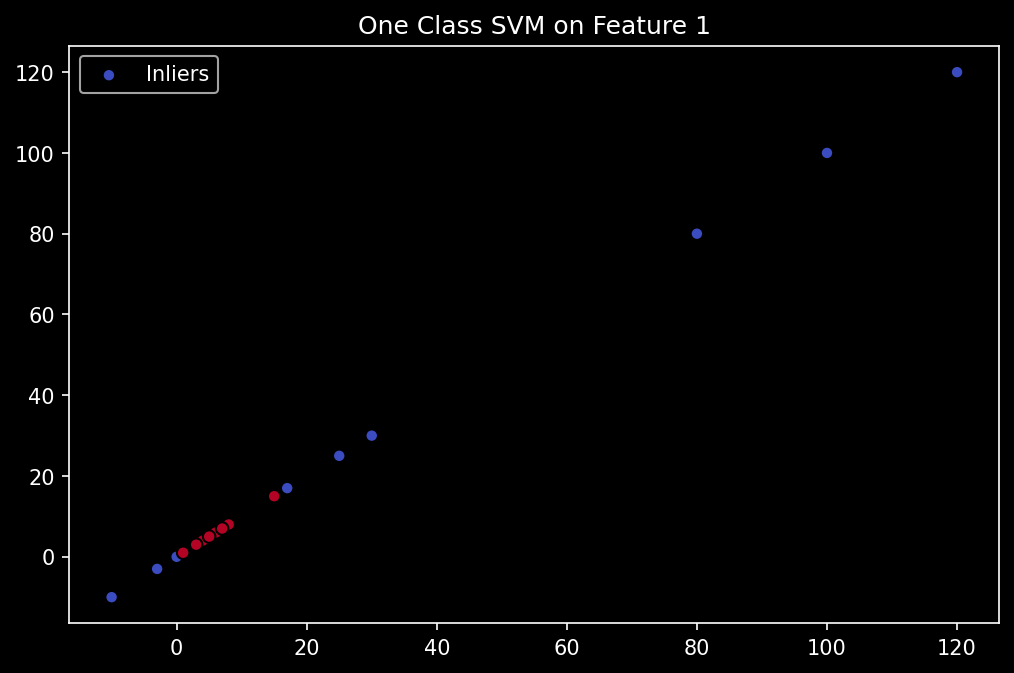

In [9]:
plt.figure(figsize=(8, 5), dpi=150)
plt.scatter(
    X1,
    X1,
    c=y1,
    cmap="coolwarm",
    edgecolor="k",
)
plt.title("One Class SVM on Feature 1")
plt.legend(["Inliers"])
plt.show()

In [10]:
print(np.sort(X2.flatten()))

[ -4   1   3   4   5   6   7  10  12  13  14  16  19  50  66  95 666]


In [11]:
print(np.sort(X2[y2 == -1].flatten()))

[ -4   1   3   4  66  95 666]


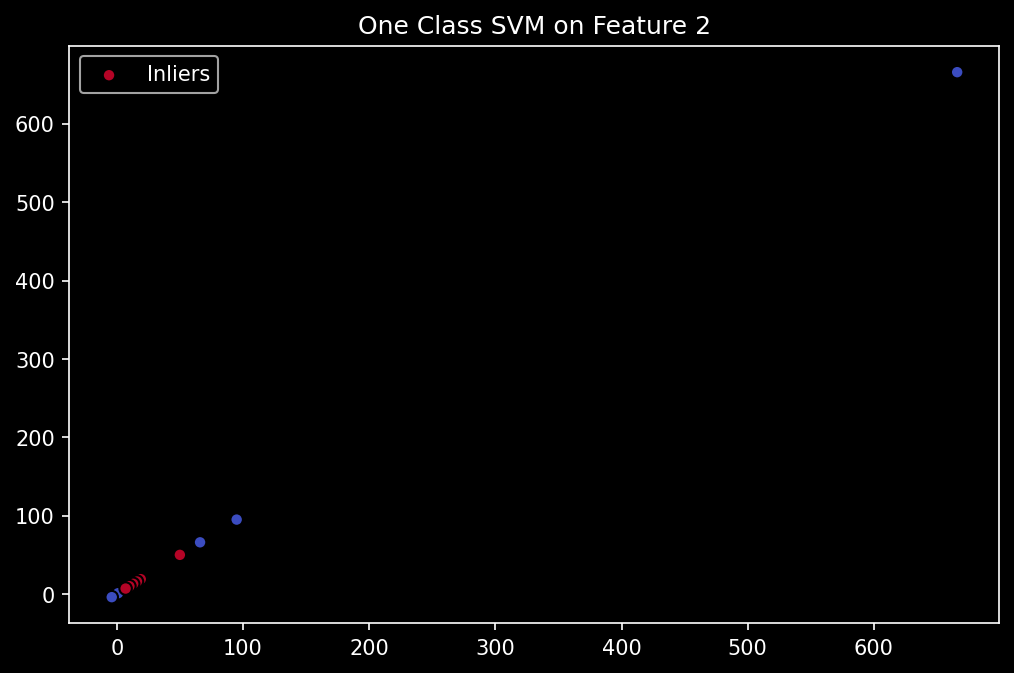

In [12]:
plt.figure(figsize=(8, 5), dpi=150)
plt.scatter(
    X2,
    X2,
    c=y2,
    cmap="coolwarm",
    edgecolor="k",
)
plt.title("One Class SVM on Feature 2")
plt.legend(["Inliers"])
plt.show()